In [ ]:
!pip install geopandas
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import geopandas
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap as cm
from sklearn import preprocessing

In [ ]:
data = pd.read_csv("Mental health Depression disorder Data.csv")

<ipython-input-253-551cc81f8614>:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Mental health Depression disorder Data.csv")


To see the example of dataset and records

In [ ]:
data.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


To see the shape i.e. the number of colummns and records in the data

In [ ]:
data.shape

(108553, 11)

Seeing number of empty entries in the dataset

In [ ]:
print(data.isnull().sum())

index                             0
Entity                            0
Code                           5412
Year                              0
Schizophrenia (%)             82678
Bipolar disorder (%)          89147
Eating disorders (%)           8317
Anxiety disorders (%)        102085
Drug use disorders (%)       102085
Depression (%)               102085
Alcohol use disorders (%)    102085
dtype: int64


There are a total of 109k rows in this dataframe. In 4 columns there are 102k values missing. The first though would be to drop these columns as most of the data in missing.
But that would result in enormous loss of data.
I want to investigate this further. I notice that not all countries recorded data points for all columns.
Basically this table acutally contains 4 tables one after the other. So it is misfiited and hence has alot of null values

Also, there are 276 unique entries in the Entity column. Since the Entity clumn represent countries, we notice that 276 is much more that the total number of countries in the world

checking the 4 tables and splitting them

In [ ]:
data[data['Year'] == 'Year'] # 4 tables

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
6468,6468,Entity,Code,Year,Prevalence in males (%),Prevalence in females (%),Population,NaN,NaN,NaN,NaN
54276,54276,Entity,Code,Year,"Suicide rate (deaths per 100,000 individuals)",Depressive disorder rates (number suffering pe...,Population,NaN,NaN,NaN,NaN
102084,102084,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Both ...,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
table1 = data.iloc[:6468]

table2 = data.iloc[6469:54276]
table2.columns = data.iloc[6468]
table2 = table2.iloc[:,:7].drop(columns = 6468)

table3 = data.iloc[54277:102084]
table3.columns = data.iloc[54276]
table3 = table3.iloc[:,:7].drop(columns = 54276)

table4 = data.iloc[102085:]
table4.columns = data.iloc[102084]
table4 = table4.iloc[:,:5].drop(columns = 102084)

checking the data type of the table

In [ ]:
table1.dtypes

index                          int64
Entity                        object
Code                          object
Year                          object
Schizophrenia (%)             object
Bipolar disorder (%)          object
Eating disorders (%)          object
Anxiety disorders (%)        float64
Drug use disorders (%)       float64
Depression (%)               float64
Alcohol use disorders (%)    float64
dtype: object

In [ ]:
table2.dtypes

6468
Entity                       object
Code                         object
Year                         object
Prevalence in males (%)      object
Prevalence in females (%)    object
Population                   object
dtype: object

In [ ]:
table3.dtypes

54276
Entity                                                      object
Code                                                        object
Year                                                        object
Suicide rate (deaths per 100,000 individuals)               object
Depressive disorder rates (number suffering per 100,000)    object
Population                                                  object
dtype: object

In [ ]:
table4.dtypes

102084
Entity                                                                                                       object
Code                                                                                                         object
Year                                                                                                         object
Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)    object
dtype: object

change the data type of columns in 4 tables

In [ ]:
dtypes1 = {'Schizophrenia (%)': 'float', 'Bipolar disorder (%)': 'float', 'Year': 'int', 'Eating disorders (%)' : 'float'}

table1 = table1.astype(dtypes1)

table2 = table2[(table2.Year.isin(table1.Year.unique().astype(str))) & (table2.Entity.isin(table1.Entity.unique()))] #Year is a str because of wrong dates
dtypes2 = {'Prevalence in males (%)': 'float', 'Prevalence in females (%)': 'float', 'Year': 'int', 'Population' : 'float'}
table2 = table2.astype(dtypes2)

table3 = table3[(table3.Year.isin(table1.Year.unique().astype(str))) & (table3.Entity.isin(table1.Entity.unique()))]
dtypes3 = {'Suicide rate (deaths per 100,000 individuals)': 'float', 'Depressive disorder rates (number suffering per 100,000)': 'float', 'Year': 'int', 'Population' : 'float'}
table3 = table3.astype(dtypes3)

table4 = table4[(table4.Year.isin(table1.Year.unique().astype(str))) & (table4.Entity.isin(table1.Entity.unique()))]
dtypes4 = {'Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)': 'float', 'Year' : 'int'}
table4 = table4.astype(dtypes4)

verify the change

In [ ]:
table1.dtypes

index                          int64
Entity                        object
Code                          object
Year                           int64
Schizophrenia (%)            float64
Bipolar disorder (%)         float64
Eating disorders (%)         float64
Anxiety disorders (%)        float64
Drug use disorders (%)       float64
Depression (%)               float64
Alcohol use disorders (%)    float64
dtype: object

In [ ]:
table2.dtypes

6468
Entity                        object
Code                          object
Year                           int64
Prevalence in males (%)      float64
Prevalence in females (%)    float64
Population                   float64
dtype: object

In [ ]:
table3.dtypes

54276
Entity                                                       object
Code                                                         object
Year                                                          int64
Suicide rate (deaths per 100,000 individuals)               float64
Depressive disorder rates (number suffering per 100,000)    float64
Population                                                  float64
dtype: object

In [ ]:
table4.dtypes

102084
Entity                                                                                                        object
Code                                                                                                          object
Year                                                                                                           int64
Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)    float64
dtype: object

merging 4 tables based on common columns

renaming some columns

In [ ]:
table = table1.merge(table2, on=['Entity', 'Year','Code'])
table = table.merge(table3, on=['Entity', 'Year','Code'])
table = table.merge(table4, on=['Entity', 'Year','Code'])

table = table.drop(columns= ['Population_y','index'])
table = table.rename(columns={'Population_x': 'Population','Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)': 'People suffering from depression'})

dropping index as it is not relevance

In [ ]:
extra = table[table.Entity.isin(['World','High SDI', 'High-income', 'High-middle SDI', 'Low SDI', 'Low-middle SDI',  'Middle SDI', 'Western Europe',
'Tropical Latin America', 'Sub-Saharan Africa', 'Sub-Saharan Africa', 'Southern Sub-Saharan Africa','Southeast Asia, East Asia, and Oceania',
'Southern Latin America','Southeast Asia','Latin America and Caribbean', 'Eastern Sub-Saharan Africa','Eastern Europe','East Asia','Central Latin America',
 'Central Sub-Saharan Africa','Central Europe, Eastern Europe, and Central Asia','Central Asia', 'Central Europe', 'High-income Asia Pacific', 'Andean Latin America'])]
index = extra.index

table = table.drop(index)

final look after makeover

In [ ]:
table.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),Prevalence in females (%),Population,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",People suffering from depression
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,3.499982,4.647815,12412000.0,10.318504,4039.755763,318435.813670
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,3.503947,4.655772,13299000.0,10.327010,4046.256034,329044.773956
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,3.508912,4.662066,14486000.0,10.271411,4053.709902,382544.572895
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,3.513429,4.669012,15817000.0,10.376123,4060.203474,440381.507393
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,3.515578,4.673050,17076000.0,10.575915,4062.290365,456916.645489


In [ ]:
table.shape

(5768, 16)

In [ ]:
print(table.isnull().sum())

Entity                                                        0
Code                                                        308
Year                                                          0
Schizophrenia (%)                                             0
Bipolar disorder (%)                                          0
Eating disorders (%)                                          0
Anxiety disorders (%)                                         0
Drug use disorders (%)                                        0
Depression (%)                                                0
Alcohol use disorders (%)                                     0
Prevalence in males (%)                                       0
Prevalence in females (%)                                     0
Population                                                  252
Suicide rate (deaths per 100,000 individuals)                 0
Depressive disorder rates (number suffering per 100,000)      0
People suffering from depression        

In [ ]:
table.columns

Index(['Entity', 'Code', 'Year', 'Schizophrenia (%)', 'Bipolar disorder (%)',
       'Eating disorders (%)', 'Anxiety disorders (%)',
       'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)',
       'Prevalence in males (%)', 'Prevalence in females (%)', 'Population',
       'Suicide rate (deaths per 100,000 individuals)',
       'Depressive disorder rates (number suffering per 100,000)',
       'People suffering from depression'],
      dtype='object')

In [ ]:
table['Population'] = table['Population'].fillna(method = 'pad')

In [ ]:
print(table.isnull().sum())

Entity                                                        0
Code                                                        308
Year                                                          0
Schizophrenia (%)                                             0
Bipolar disorder (%)                                          0
Eating disorders (%)                                          0
Anxiety disorders (%)                                         0
Drug use disorders (%)                                        0
Depression (%)                                                0
Alcohol use disorders (%)                                     0
Prevalence in males (%)                                       0
Prevalence in females (%)                                     0
Population                                                    0
Suicide rate (deaths per 100,000 individuals)                 0
Depressive disorder rates (number suffering per 100,000)      0
People suffering from depression        

In [ ]:
table[table.isnull().any(axis=1)]

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),Prevalence in females (%),Population,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",People suffering from depression
280,Australasia,NaN,1990,0.357272,1.139509,0.688709,6.814156,2.128077,4.543521,1.404956,3.692372,5.371230,2945000.0,12.869791,4096.512706,8.890793e+05
281,Australasia,NaN,1991,0.357778,1.142420,0.691371,6.814689,2.178211,4.587576,1.440458,3.713780,5.436042,2945000.0,12.731542,4125.935313,9.078414e+05
282,Australasia,NaN,1992,0.358273,1.145166,0.693961,6.816471,2.224164,4.625287,1.472932,3.731260,5.492021,2945000.0,12.787859,4150.224340,9.252438e+05
283,Australasia,NaN,1993,0.358720,1.147570,0.698179,6.818327,2.261818,4.658598,1.501013,3.745718,5.542379,2945000.0,12.485174,4171.744589,9.415812e+05
284,Australasia,NaN,1994,0.359051,1.149378,0.702619,6.818651,2.290779,4.683520,1.523157,3.755516,5.580704,2945000.0,12.818978,4187.872787,9.561760e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6351,Western Sub-Saharan Africa,NaN,2013,0.173905,0.635737,0.136469,2.899641,0.477964,3.805780,0.966526,2.995206,4.579575,94601000.0,9.627962,3759.406280,1.028858e+07
6352,Western Sub-Saharan Africa,NaN,2014,0.174254,0.636185,0.138116,2.902038,0.480415,3.787750,0.967383,2.980227,4.552274,94601000.0,9.612866,3739.190555,1.054817e+07
6353,Western Sub-Saharan Africa,NaN,2015,0.174616,0.636682,0.139784,2.904311,0.482921,3.762850,0.968057,2.960508,4.516452,94601000.0,9.571174,3711.935092,1.079875e+07
6354,Western Sub-Saharan Africa,NaN,2016,0.174980,0.637211,0.141193,2.906350,0.485547,3.733871,0.968472,2.937642,4.476059,94601000.0,9.557752,3680.499025,1.104348e+07


Basically there is no code for region or collection of countries. So there are 980 empty code records. They will not be useful to us and will hinder in the mapping using geopandas so we will list wise delete them

In [ ]:
table.dropna(inplace=True)

In [ ]:
print(table.isnull().sum())

Entity                                                      0
Code                                                        0
Year                                                        0
Schizophrenia (%)                                           0
Bipolar disorder (%)                                        0
Eating disorders (%)                                        0
Anxiety disorders (%)                                       0
Drug use disorders (%)                                      0
Depression (%)                                              0
Alcohol use disorders (%)                                   0
Prevalence in males (%)                                     0
Prevalence in females (%)                                   0
Population                                                  0
Suicide rate (deaths per 100,000 individuals)               0
Depressive disorder rates (number suffering per 100,000)    0
People suffering from depression                            0
dtype: i

In [ ]:
table

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),Prevalence in females (%),Population,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",People suffering from depression
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,3.499982,4.647815,12412000.0,10.318504,4039.755763,318435.813670
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,3.503947,4.655772,13299000.0,10.327010,4046.256034,329044.773956
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,3.508912,4.662066,14486000.0,10.271411,4053.709902,382544.572895
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,3.513429,4.669012,15817000.0,10.376123,4060.203474,440381.507393
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,3.515578,4.673050,17076000.0,10.575915,4062.290365,456916.645489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,ZWE,2013,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641,2.769193,3.424106,13350000.0,28.361200,3048.264249,303564.603590
6464,Zimbabwe,ZWE,2014,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470,2.778101,3.437674,13587000.0,27.605547,3056.996704,311665.769283
6465,Zimbabwe,ZWE,2015,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751,2.789152,3.455323,13815000.0,27.197061,3068.250731,320638.507158
6466,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269,2.799308,3.479071,14030000.0,26.839591,3081.782858,330437.353798


finding the correlation matrix to see the features interact with one another

In [ ]:
table[table.columns[3:10]].corr()

,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
Schizophrenia (%),1.000000,0.240321,0.688552,0.471856,0.405378,0.125853,-0.043847
Bipolar disorder (%),0.240321,1.000000,0.704115,0.654528,0.349550,0.112000,0.061794
Eating disorders (%),0.688552,0.704115,1.000000,0.676386,0.420955,0.194129,0.031803
Anxiety disorders (%),0.471856,0.654528,0.676386,1.000000,0.595179,0.341838,-0.155023
Drug use disorders (%),0.405378,0.349550,0.420955,0.595179,1.000000,0.315943,-0.157054
Depression (%),0.125853,0.112000,0.194129,0.341838,0.315943,1.000000,0.046693
Alcohol use disorders (%),-0.043847,0.061794,0.031803,-0.155023,-0.157054,0.046693,1.000000


Graphical representation of correlation over the years and in recent years. (2015 - 2017)

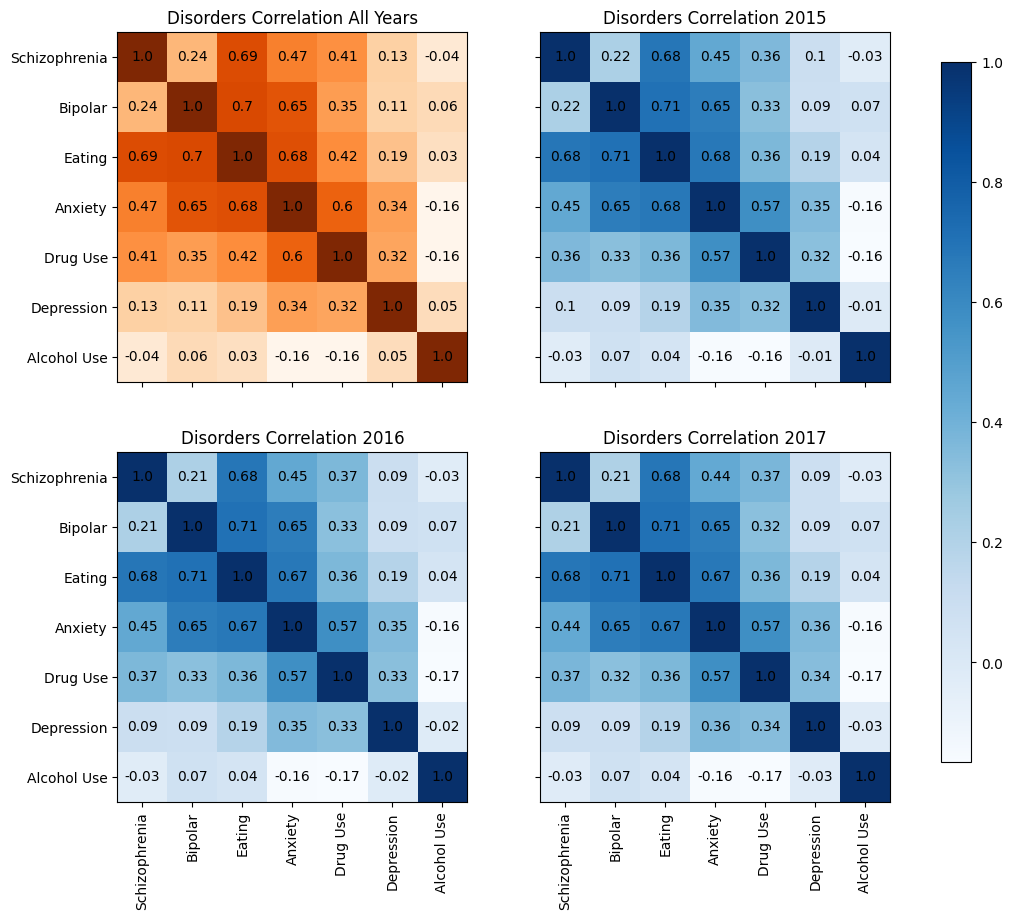

In [ ]:
corr = table[table.columns[3:10]].corr() #Correlation over all countries and all years

index = ['Schizophrenia', 'Bipolar', 'Eating', 'Anxiety', 'Drug Use', 'Depression', 'Alcohol Use']

fig, ax = plt.subplots(2,2,figsize=(10,10), sharex=True, sharey= True);

im = ax[0,0].imshow(corr, cmap='Oranges');

ax[0,0].xaxis.set_ticks([0,1,2,3,4,5,6])
ax[0,0].yaxis.set_ticks([0,1,2,3,4,5,6])
ax[0,0].set_xticklabels(index, rotation=90, minor = False);
ax[0,0].set_yticklabels(index,);
ax[0,0].set_title('Disorders Correlation All Years')

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax[0,0].text(j, i, round(corr.to_numpy()[i, j], 2),
                       ha="center", va="center", color="black")

corr = table[table['Year'] == 2015][table.columns[3:10]].corr()

im = ax[0,1].imshow(corr, cmap='Blues');

ax[0,1].xaxis.set_ticks([0,1,2,3,4,5,6])
ax[0,1].yaxis.set_ticks([0,1,2,3,4,5,6])
ax[0,1].set_xticklabels(index, rotation=90, minor = False);
ax[0,1].set_yticklabels(index,);
ax[0,1].set_title(f'Disorders Correlation {2015}')

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax[0,1].text(j, i, round(corr.to_numpy()[i, j], 2),
                       ha="center", va="center", color="black")


for k in range(2):
    corr = table[table['Year'] == 2016 + k][table.columns[3:10]].corr()
    im = ax[1,k].imshow(corr, cmap='Blues');

    ax[1,k].xaxis.set_ticks([0,1,2,3,4,5,6])
    ax[1,k].yaxis.set_ticks([0,1,2,3,4,5,6])
    ax[1,k].set_xticklabels(index, rotation=90, minor = False);
    ax[1,k].set_yticklabels(index,);
    ax[1,k].set_title(f'Disorders Correlation {2016 + k}')

    for i in range(len(corr.columns)):
        for j in range(len(corr.columns)):
            text = ax[1,k].text(j, i, round(corr.to_numpy()[i, j], 2),
                        ha="center", va="center", color="black")

cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7])
fig.colorbar(im, cax=cbar_ax)


plt.show();

positive correlation shows a dependent relation

negative correlation shows an inverse relation

1 shows linear progression realation ie. one to one

In general, we see that all disorders have pretty much positive correlation except mostly alcohol Use where we see negative correlation with others.

In [ ]:
corr = table[table.columns[3:10]].corr()
corr.mean(axis=1).sort_values(ascending=False)

Eating disorders (%)         0.530849
Anxiety disorders (%)        0.512109
Bipolar disorder (%)         0.446044
Drug use disorders (%)       0.418565
Schizophrenia (%)            0.412588
Depression (%)               0.305208
Alcohol use disorders (%)    0.112052
dtype: float64

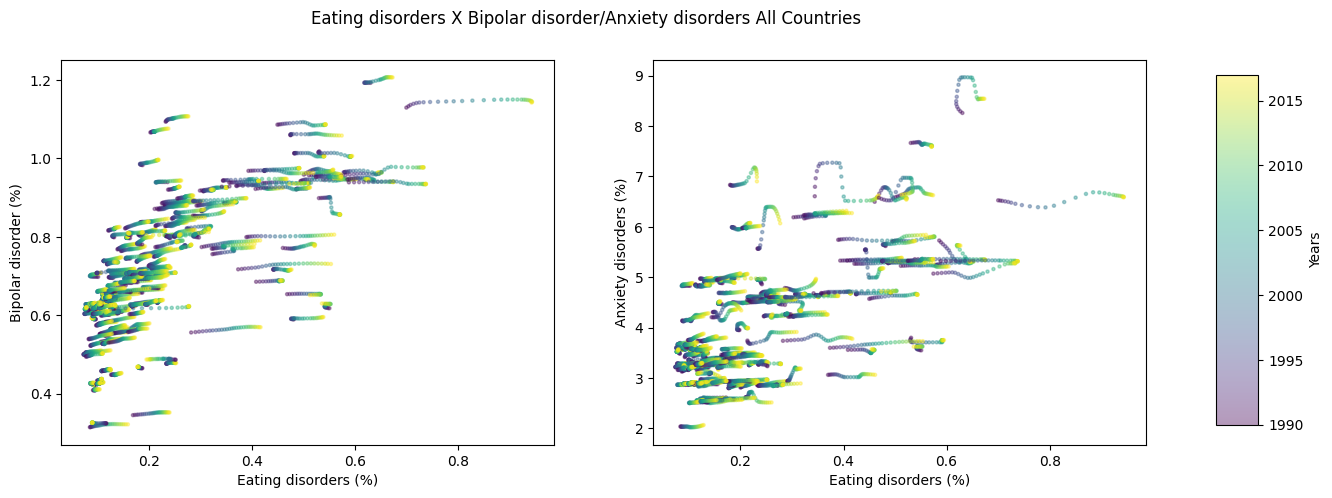

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (14,5), sharex=True)

im = ax[0].scatter(table['Eating disorders (%)'], table['Bipolar disorder (%)'], c=table['Year'], s= 5, alpha= 0.4);
im = ax[1].scatter(table['Eating disorders (%)'], table['Anxiety disorders (%)'], c=table['Year'], s= 5, alpha= 0.4);
ax[0].set_xlabel('Eating disorders (%)')
ax[0].set_ylabel('Bipolar disorder (%)')
ax[1].set_xlabel('Eating disorders (%)')
ax[1].set_ylabel('Anxiety disorders (%)')

cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7])
fig.colorbar(im, cax=cbar_ax, label = 'Years')
plt.suptitle('Eating disorders X Bipolar disorder/Anxiety disorders All Countries');

In the scatter plot, we see a general trend of positive dependence of Eating disorder with Bipolar disorder or Anxiety disorder. However, we see quite alot of stagnant plots too over the years.

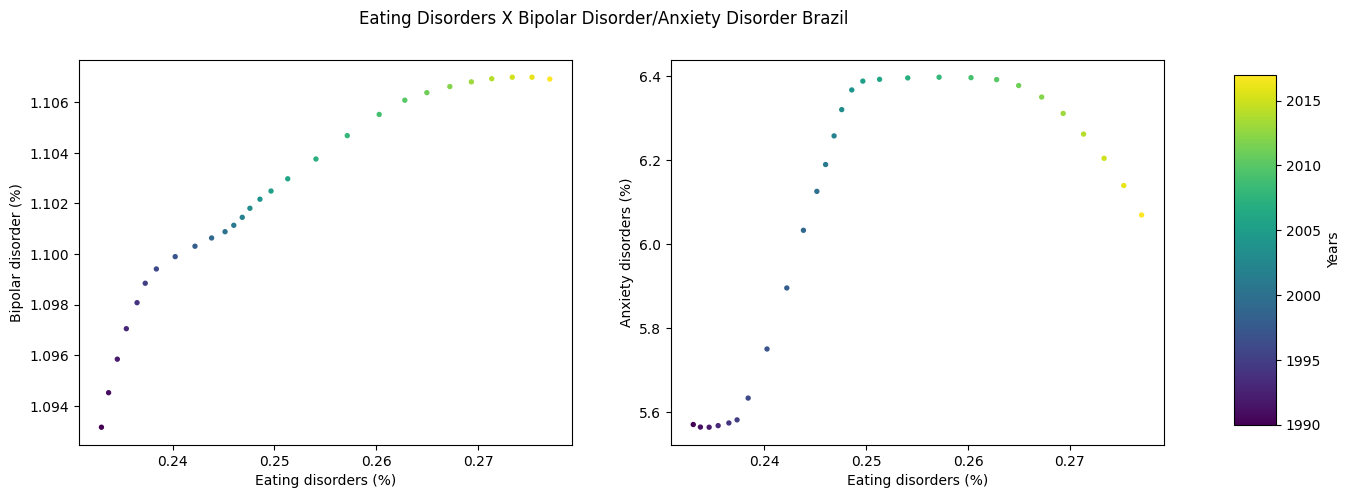

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (14,5), sharex=True)

brazil = table[table.Entity.isin(['Brazil'])]

im = ax[0].scatter(brazil['Eating disorders (%)'], brazil['Bipolar disorder (%)'], c=brazil['Year'], s= 8, alpha= 1);
im = ax[1].scatter(brazil['Eating disorders (%)'], brazil['Anxiety disorders (%)'], c=brazil['Year'], s= 8, alpha= 1);
ax[0].set_xlabel('Eating disorders (%)')
ax[0].set_ylabel('Bipolar disorder (%)')
ax[1].set_xlabel('Eating disorders (%)')
ax[1].set_ylabel('Anxiety disorders (%)')

cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7])
fig.colorbar(im, cax=cbar_ax, label = 'Years')
plt.suptitle('Eating Disorders X Bipolar Disorder/Anxiety Disorder Brazil');

This is the output regarding countries dealing with Eating disorder vs Bipolar disorder or Anxiety disorder

In [ ]:
mean = table[table.columns[3:10]].mean(axis=0)
std = table[table.columns[3:10]].std(axis=0)
norm = (table[table.columns[3:10]] - mean)/std
norm = pd.concat([table['Year'],norm], axis = 1)

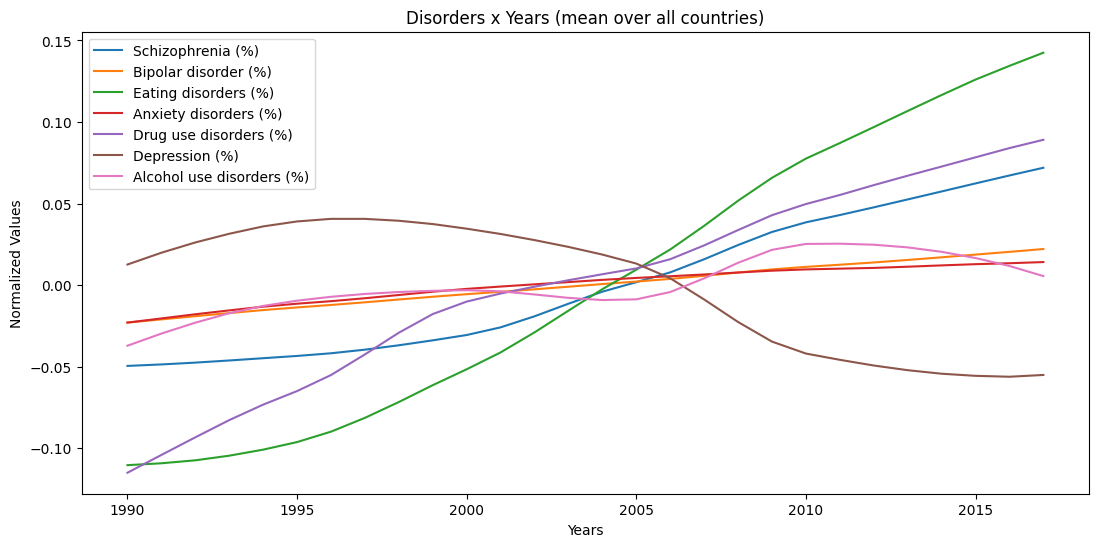

In [ ]:
norm.groupby('Year').mean().plot(figsize=(13,6), title='Disorders x Years (mean over all countries)', ylabel = 'Normalized Values', xlabel = 'Years');


The temporal graph over the average of percentage of all countries shows a rather elaborate case of increase in almost all cases.

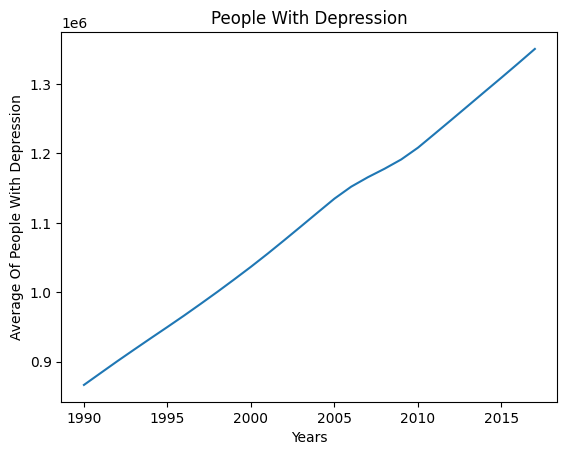

In [ ]:
avgdep = table.groupby('Year').mean(numeric_only=True)
avgdep['People suffering from depression'].plot(title = 'People With Depression',  xlabel = 'Years', ylabel = 'Average Of People With Depression' );

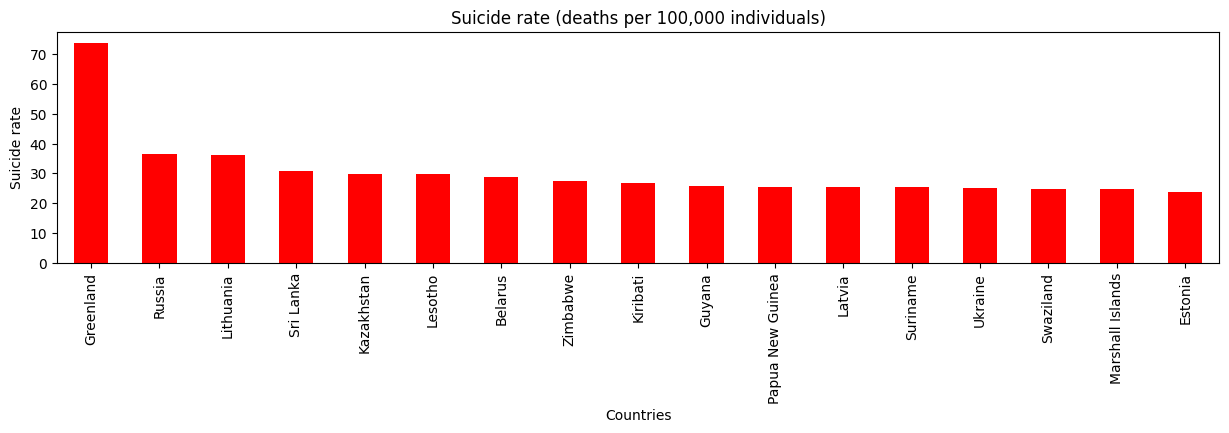

In [ ]:
table.groupby(['Entity']).mean(numeric_only = True).sort_values('Suicide rate (deaths per 100,000 individuals)', ascending = False)['Suicide rate (deaths per 100,000 individuals)'][:17].plot.bar(color='red', figsize=(15,3), title='Suicide rate (deaths per 100,000 individuals)', ylabel = 'Suicide rate', xlabel='Countries');

To go more into the countries with leading cases of suicide rate per 100,000. We see overwhelming lead by Greenland followed by Russia etc

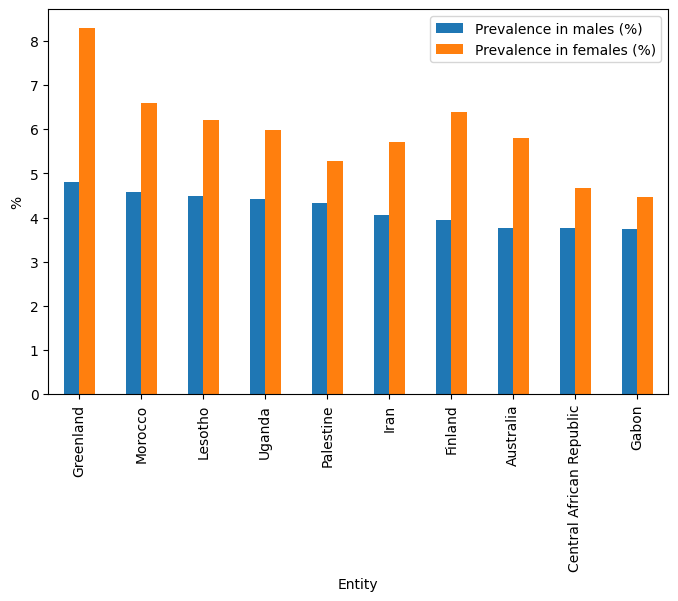

In [ ]:
table.groupby('Entity').mean(numeric_only = True)[['Prevalence in males (%)','Prevalence in females (%)']].sort_values('Prevalence in males (%)', ascending = False)[:10].plot.bar(ylabel= ('%'), figsize = (8,5));

To see the gender factor playing into mental health disorders, we graph a bar chart against countries in leading

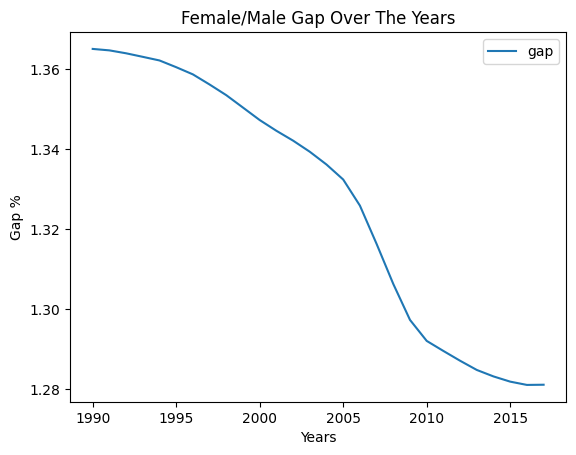

In [ ]:
gap = table
gap['gap'] = np.abs(table['Prevalence in females (%)'] - table['Prevalence in males (%)'])
gap.groupby('Year').mean(numeric_only=True)[['gap']].plot(title = 'Female/Male Gap Over The Years', xlabel = 'Years', ylabel = 'Gap %');

We see however that over the year men appear to be catching up to women as the gap has been shown to decrease.

In [ ]:
geo = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

<ipython-input-291-597ea5fab8b6>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  geo = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


In [ ]:
inworld = np.in1d(geo.iso_a3.sort_values().unique(),gap.Code.sort_values().unique())

miss = geo.iso_a3.sort_values().unique()[~inworld] # Codes that are in the geo dataset, and are not in table

geo[geo.iso_a3.isin(miss)]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
20,3398.0,South America,Falkland Is.,FLK,282,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2..."
23,140.0,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16,"POLYGON ((68.93500 -48.62500, 69.58000 -48.940..."
134,287800.0,Oceania,New Caledonia,NCL,10770,"POLYGON ((165.77999 -21.08000, 166.59999 -21.7..."
159,4490.0,Antarctica,Antarctica,ATA,898,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140..."
160,326000.0,Asia,N. Cyprus,CYN,3600,"POLYGON ((32.73178 35.14003, 32.80247 35.14550..."
167,5096159.0,Africa,Somaliland,SOL,17836,"POLYGON ((48.94820 11.41062, 48.94820 11.41062..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."


In [ ]:
# Matching codes

index = gap[gap.Entity.isin(['Western Sub-Saharan Africa'])].index
change = {'CYP': 'CYN'}

tablegeo = gap.replace({'Code':change})

for i in index:
    tablegeo.at[i,'Code'] = 'ESH'

tablegeo = geo.merge(tablegeo[tablegeo['Year'] == 2017], left_on = 'iso_a3', right_on= 'Code', how='left')  #tablegeo with both datasets

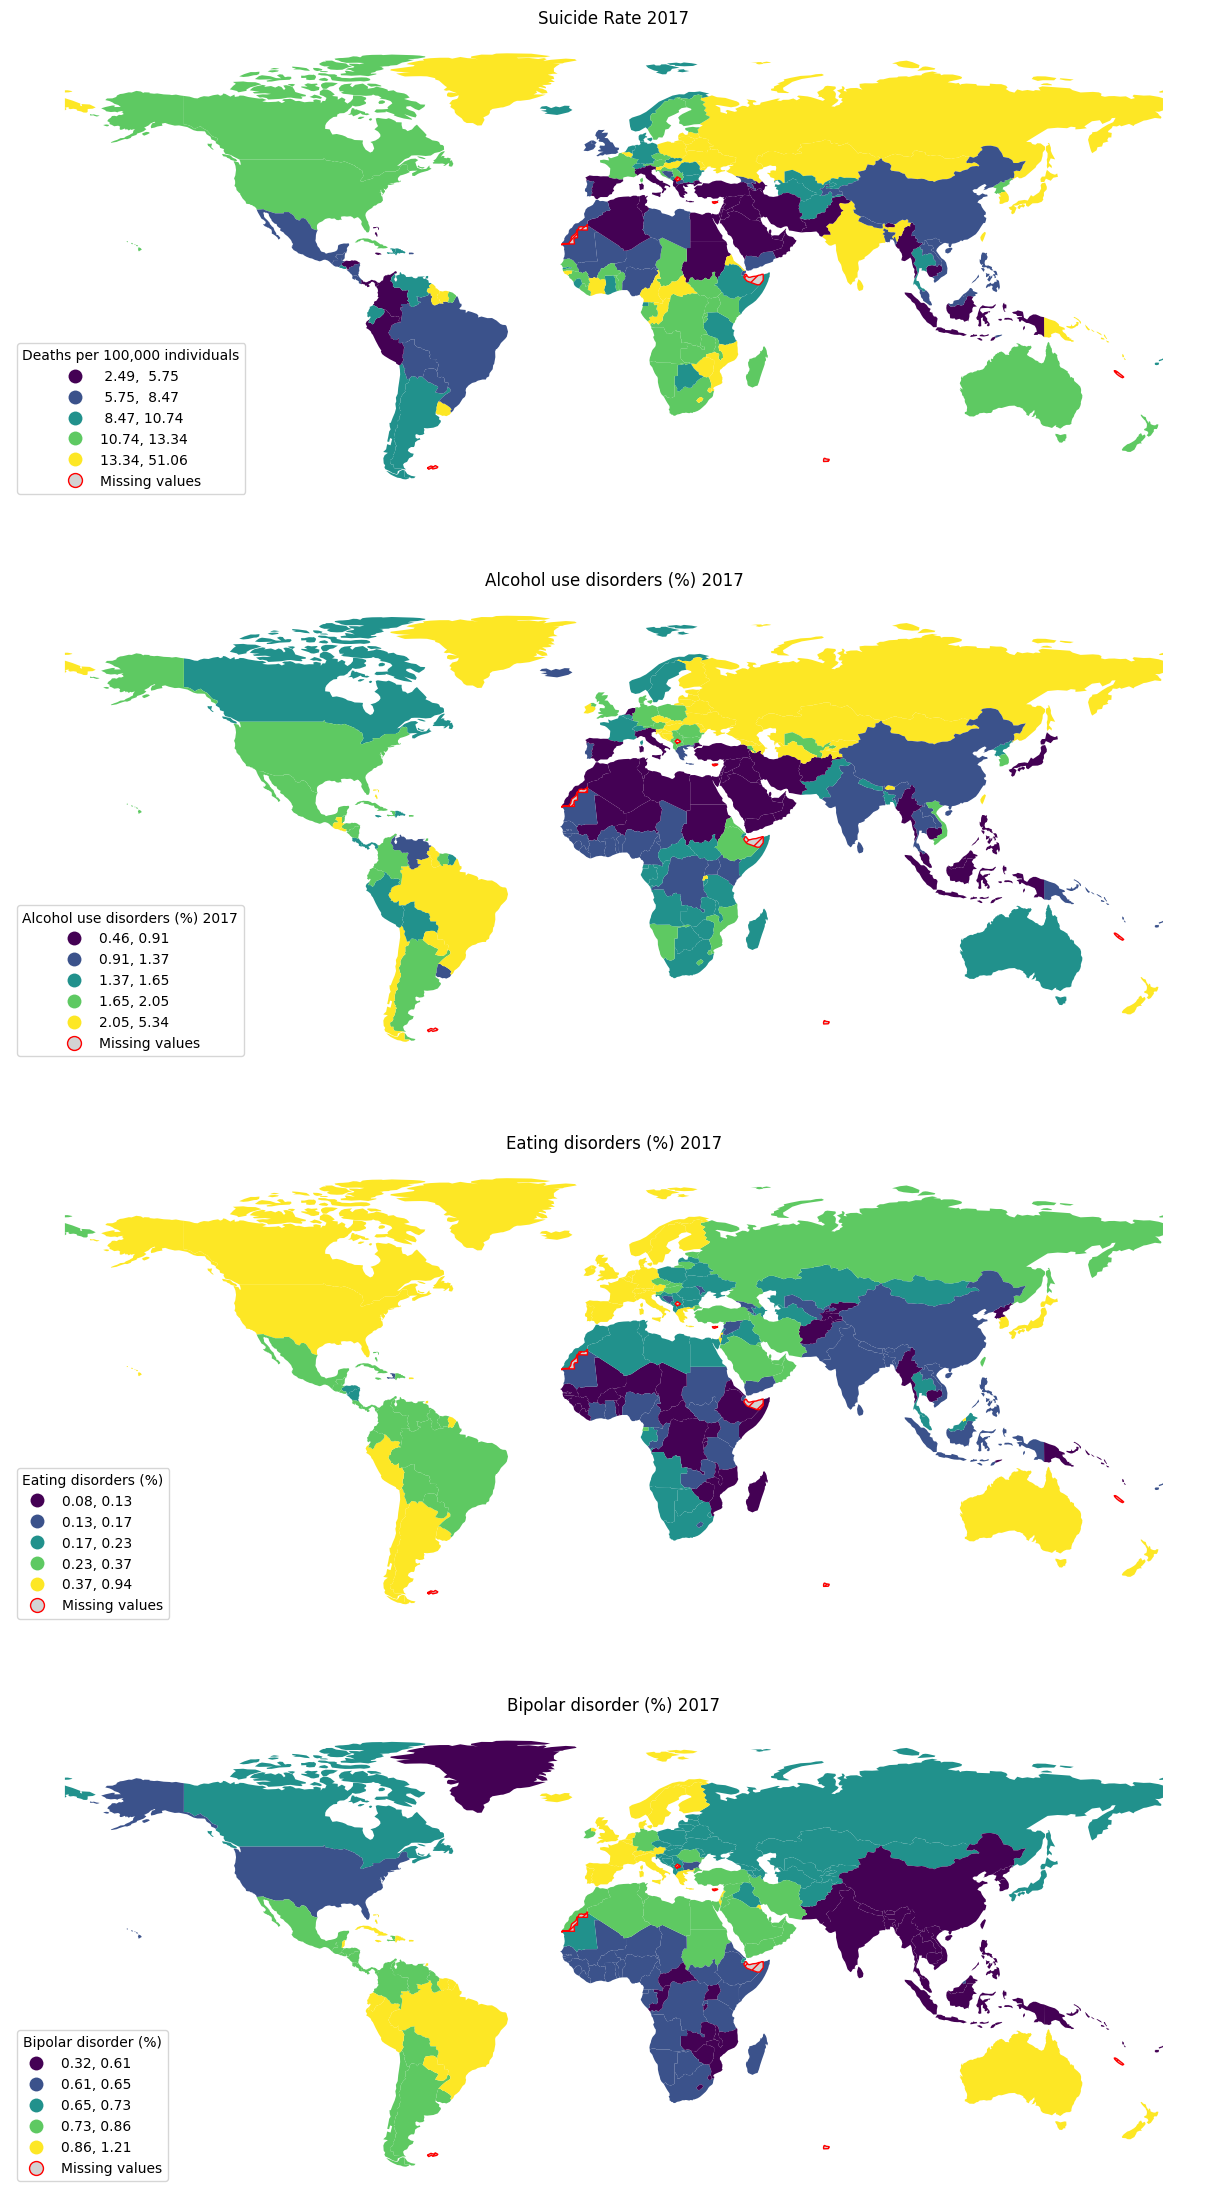

In [ ]:
img = tablegeo[(tablegeo.name!="Antarctica")];  #remove Antarctica

fig, ax = plt.subplots(4, 1, figsize= (25,28))


img.plot(column='Suicide rate (deaths per 100,000 individuals)', ax=ax[0], legend=True, scheme="quantiles", legend_kwds={'loc':'lower left', 'title':'Deaths per 100,000 individuals'}, missing_kwds={
        "color": "lightgray",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    });
ax[0].set_axis_off()
ax[0].set_title('Suicide Rate 2017');

img.plot(column='Alcohol use disorders (%)', ax=ax[1], legend=True, scheme="quantiles", legend_kwds={'loc':'lower left', 'title':'Alcohol use disorders (%) 2017'}, missing_kwds={
        "color": "lightgray",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    });

ax[1].set_axis_off()
ax[1].set_title('Alcohol use disorders (%) 2017');

img.plot(column='Eating disorders (%)', ax=ax[2], legend=True, scheme="quantiles", legend_kwds={'loc':'lower left', 'title':'Eating disorders (%)'}, missing_kwds={
        "color": "lightgray",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    });

ax[2].set_axis_off()
ax[2].set_title('Eating disorders (%) 2017');

img.plot(column='Bipolar disorder (%)', ax=ax[3], legend=True, scheme="quantiles", legend_kwds={'loc':'lower left', 'title':'Bipolar disorder (%)'}, missing_kwds={
        "color": "lightgray",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    });

ax[3].set_axis_off()
ax[3].set_title('Bipolar disorder (%) 2017');

With categorizing the numerals of suicide rates, and various disorder, we plot the intensity of these disorders on the world map

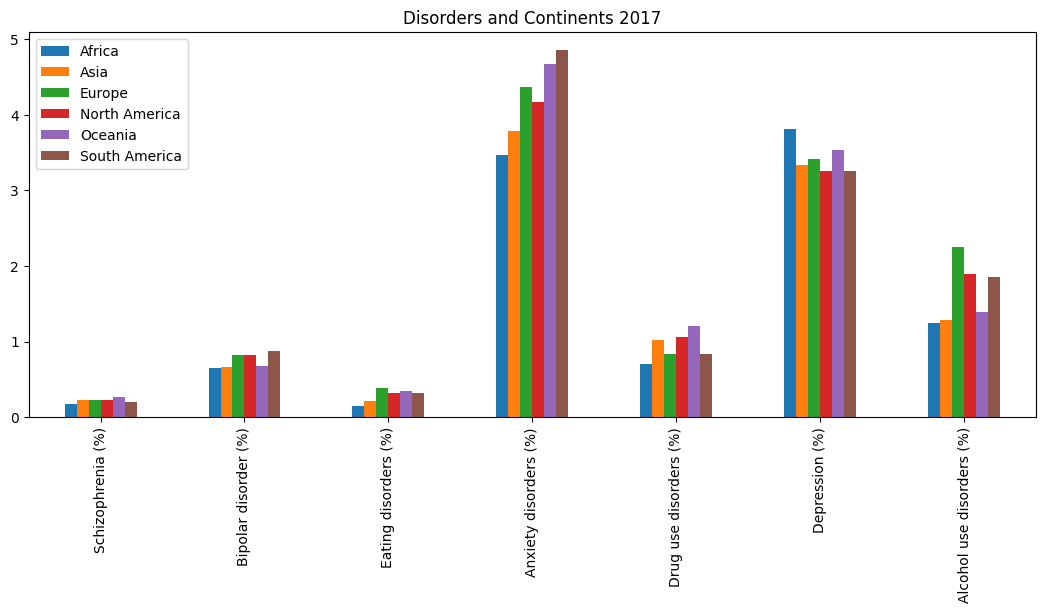

In [ ]:
tablegeo[['continent','Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)',
       'Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)',
       'Alcohol use disorders (%)']].groupby('continent').mean().dropna().transpose().plot.bar(title = 'Disorders and Continents 2017', figsize = (13,5))
plt.legend(loc= 'upper left');

Too give a more high level view on the disorders, we decided to include the continent wise data. Africa mostly seem to lesser in data while Europe and South America appear to be leading.

In [ ]:
table[table.columns[2:10]].corr()

,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
Year,1.000000,0.040711,0.013296,0.085036,0.010782,0.059098,-0.032716,0.014414
Schizophrenia (%),0.040711,1.000000,0.240321,0.688552,0.471856,0.405378,0.125853,-0.043847
Bipolar disorder (%),0.013296,0.240321,1.000000,0.704115,0.654528,0.349550,0.112000,0.061794
Eating disorders (%),0.085036,0.688552,0.704115,1.000000,0.676386,0.420955,0.194129,0.031803
Anxiety disorders (%),0.010782,0.471856,0.654528,0.676386,1.000000,0.595179,0.341838,-0.155023
Drug use disorders (%),0.059098,0.405378,0.349550,0.420955,0.595179,1.000000,0.315943,-0.157054
Depression (%),-0.032716,0.125853,0.112000,0.194129,0.341838,0.315943,1.000000,0.046693
Alcohol use disorders (%),0.014414,-0.043847,0.061794,0.031803,-0.155023,-0.157054,0.046693,1.000000


In [ ]:
table[table.columns[10:13]].corr()

,Prevalence in males (%),Prevalence in females (%),Population
Prevalence in males (%),1.000000,0.809906,0.016099
Prevalence in females (%),0.809906,1.000000,0.063677
Population,0.016099,0.063677,1.000000


In [ ]:
table[table.columns[13:16]].corr()

,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",People suffering from depression
"Suicide rate (deaths per 100,000 individuals)",1.000000,0.413310,0.028214
"Depressive disorder rates (number suffering per 100,000)",0.413310,1.000000,0.069155
People suffering from depression,0.028214,0.069155,1.000000


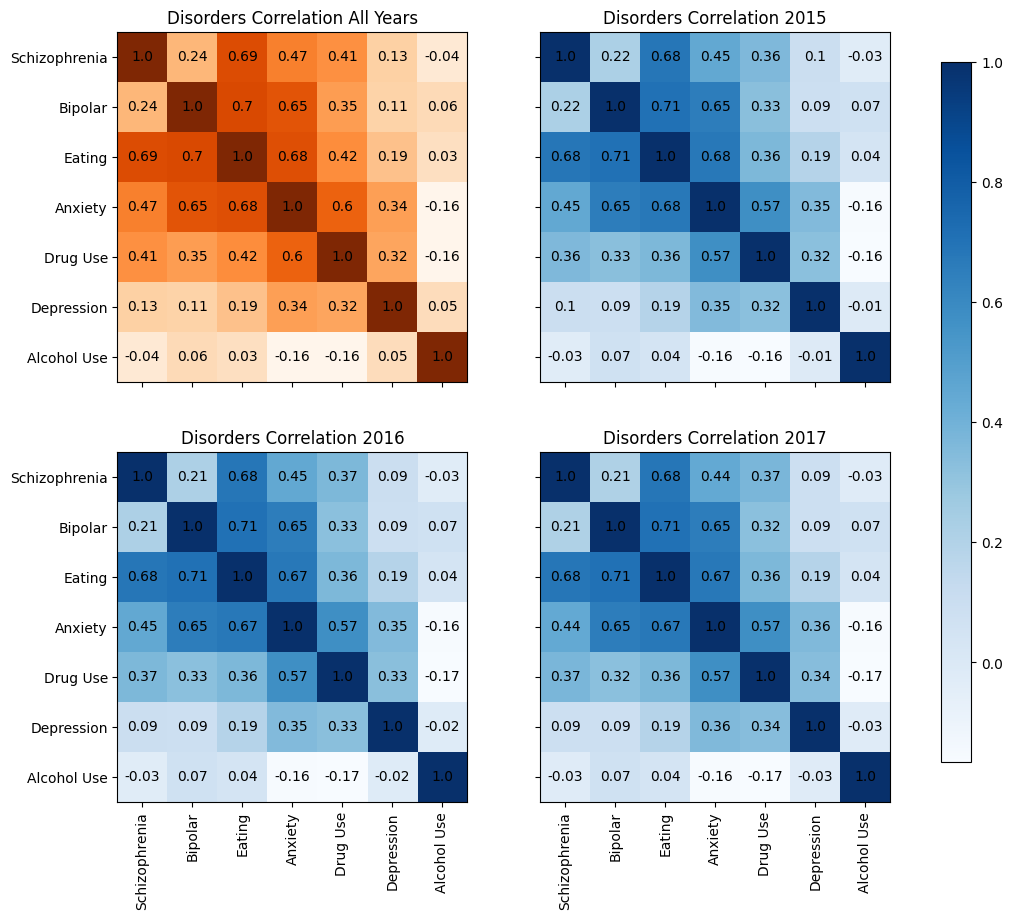

In [ ]:
corr = table[table.columns[3:10]].corr() #Correlation over all countries and all years

index = ['Schizophrenia', 'Bipolar', 'Eating', 'Anxiety', 'Drug Use', 'Depression', 'Alcohol Use']

fig, ax = plt.subplots(2,2,figsize=(10,10), sharex=True, sharey= True);

im = ax[0,0].imshow(corr, cmap='Oranges');

ax[0,0].xaxis.set_ticks([0,1,2,3,4,5,6])
ax[0,0].yaxis.set_ticks([0,1,2,3,4,5,6])
ax[0,0].set_xticklabels(index, rotation=90, minor = False);
ax[0,0].set_yticklabels(index,);
ax[0,0].set_title('Disorders Correlation All Years')

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax[0,0].text(j, i, round(corr.to_numpy()[i, j], 2),
                       ha="center", va="center", color="black")

corr = table[table['Year'] == 2015][table.columns[3:10]].corr()

im = ax[0,1].imshow(corr, cmap='Blues');

ax[0,1].xaxis.set_ticks([0,1,2,3,4,5,6])
ax[0,1].yaxis.set_ticks([0,1,2,3,4,5,6])
ax[0,1].set_xticklabels(index, rotation=90, minor = False);
ax[0,1].set_yticklabels(index,);
ax[0,1].set_title(f'Disorders Correlation {2015}')

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax[0,1].text(j, i, round(corr.to_numpy()[i, j], 2),
                       ha="center", va="center", color="black")


for k in range(2):
    corr = table[table['Year'] == 2016 + k][table.columns[3:10]].corr()
    im = ax[1,k].imshow(corr, cmap='Blues');

    ax[1,k].xaxis.set_ticks([0,1,2,3,4,5,6])
    ax[1,k].yaxis.set_ticks([0,1,2,3,4,5,6])
    ax[1,k].set_xticklabels(index, rotation=90, minor = False);
    ax[1,k].set_yticklabels(index,);
    ax[1,k].set_title(f'Disorders Correlation {2016 + k}')

    for i in range(len(corr.columns)):
        for j in range(len(corr.columns)):
            text = ax[1,k].text(j, i, round(corr.to_numpy()[i, j], 2),
                        ha="center", va="center", color="black")

cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7])
fig.colorbar(im, cax=cbar_ax)


plt.show();

In [ ]:
corr = table[table.columns[2:10]].corr()
corr.mean(axis=1).sort_values(ascending=False)

Eating disorders (%)         0.475122
Anxiety disorders (%)        0.449443
Bipolar disorder (%)         0.391950
Drug use disorders (%)       0.373631
Schizophrenia (%)            0.366103
Depression (%)               0.262967
Year                         0.148828
Alcohol use disorders (%)    0.099848
dtype: float64

In [ ]:
table[table.columns[2:10]].cov()

,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
Year,65.261953,0.013805,0.017660,0.106140,0.099097,0.211159,-0.177988,0.100627
Schizophrenia (%),0.013805,0.001762,0.001659,0.004466,0.022533,0.007526,0.003558,-0.001590
Bipolar disorder (%),0.017660,0.001659,0.027032,0.017887,0.122428,0.025419,0.012401,0.008780
Eating disorders (%),0.106140,0.004466,0.017887,0.023872,0.118893,0.028767,0.020200,0.004246
Anxiety disorders (%),0.099097,0.022533,0.122428,0.118893,1.294274,0.299480,0.261902,-0.152403
Drug use disorders (%),0.211159,0.007526,0.025419,0.028767,0.299480,0.195621,0.094107,-0.060026
Depression (%),-0.177988,0.003558,0.012401,0.020200,0.261902,0.094107,0.453535,0.027173
Alcohol use disorders (%),0.100627,-0.001590,0.008780,0.004246,-0.152403,-0.060026,0.027173,0.746743


In [ ]:
table[table.columns[10:13]].cov()

,Prevalence in males (%),Prevalence in females (%),Population
Prevalence in males (%),3.060934e-01,3.856849e-01,1.133869e+06
Prevalence in females (%),3.856849e-01,7.408710e-01,6.977471e+06
Population,1.133869e+06,6.977471e+06,1.620669e+16


In [ ]:
table[table.columns[13:16]].cov()

,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",People suffering from depression
"Suicide rate (deaths per 100,000 individuals)",7.024734e+01,2.209101e+03,1.051228e+06
"Depressive disorder rates (number suffering per 100,000)",2.209101e+03,4.066759e+05,1.960453e+08
People suffering from depression,1.051228e+06,1.960453e+08,1.976156e+13


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


feature engineering to get the values of categorical data into numeric data type.

In [ ]:
table
countries_list = table['Entity'].unique().tolist()

In [ ]:
countries_list

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guinea-Biss

In [ ]:
print(len(table['Entity'].unique()))

195


In [ ]:
lst = [x for x in range(195)]
table['Entity'].replace(table['Entity'].unique(),
                        lst, inplace=True)

country_mapping = {}
for index, country in enumerate(countries_list):
    country_mapping[country] = index


table

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),Prevalence in females (%),Population,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",People suffering from depression,gap
0,0,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,3.499982,4.647815,12412000.0,10.318504,4039.755763,318435.813670,1.147833
1,0,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,3.503947,4.655772,13299000.0,10.327010,4046.256034,329044.773956,1.151825
2,0,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,3.508912,4.662066,14486000.0,10.271411,4053.709902,382544.572895,1.153154
3,0,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,3.513429,4.669012,15817000.0,10.376123,4060.203474,440381.507393,1.155583
4,0,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,3.515578,4.673050,17076000.0,10.575915,4062.290365,456916.645489,1.157472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,194,ZWE,2013,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641,2.769193,3.424106,13350000.0,28.361200,3048.264249,303564.603590,0.654913
6464,194,ZWE,2014,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470,2.778101,3.437674,13587000.0,27.605547,3056.996704,311665.769283,0.659573
6465,194,ZWE,2015,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751,2.789152,3.455323,13815000.0,27.197061,3068.250731,320638.507158,0.666171
6466,194,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269,2.799308,3.479071,14030000.0,26.839591,3081.782858,330437.353798,0.679763


In [ ]:
print(len(table['Entity'].unique()))

195


In [ ]:
table = table.drop('Code', axis = 1)

In [ ]:
print(table.columns)

Index(['Entity', 'Year', 'Schizophrenia (%)', 'Bipolar disorder (%)',
       'Eating disorders (%)', 'Anxiety disorders (%)',
       'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)',
       'Prevalence in males (%)', 'Prevalence in females (%)', 'Population',
       'Suicide rate (deaths per 100,000 individuals)',
       'Depressive disorder rates (number suffering per 100,000)',
       'People suffering from depression', 'gap'],
      dtype='object')


In [ ]:
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(table)

# Apply PCA to reduce dimensionality
#n_components = 2  # Specify the number of principal components
#pca = PCA(n_components=n_components)
#X_pca = pca.fit_transform(X_scaled)


In [ ]:
#X_pca

In [ ]:
input_attributes = ['Entity', 'Year']
input_table = table[input_attributes]
input_table

,Entity,Year
0,0,1990
1,0,1991
2,0,1992
3,0,1993
4,0,1994
...,...,...
6463,194,2013
6464,194,2014
6465,194,2015
6466,194,2016


Scaling the input table to get PCA.
This also feature engineering

In [ ]:
# Scale data before applying PCA
scaling_x=StandardScaler()

# Use fit and transform method
scaling_x.fit(input_table)
Scaled_x_data=scaling_x.transform(input_table)


In [ ]:
Scaled_x_data

array([[-1.72, -1.67],
       [-1.72, -1.55],
       [-1.72, -1.42],
       ...,
       [ 1.72,  1.42],
       [ 1.72,  1.55],
       [ 1.72,  1.67]])

In [ ]:

# Set the n_components=1
n_components = 1
principal=PCA(n_components)
principal.fit(Scaled_x_data)
x=principal.transform(Scaled_x_data)

# Check the dimensions of data after PCA
print(x.shape)

(5460, 1)


In [ ]:
x

array([[-1.67],
       [-1.55],
       [-1.42],
       ...,
       [ 1.42],
       [ 1.55],
       [ 1.67]])

In [ ]:
principal.components_

array([[0., 1.]])

In [ ]:
output_attributes = ['Schizophrenia (%)', 'Bipolar disorder (%)',
       'Eating disorders (%)', 'Anxiety disorders (%)',
       'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)',
       'Prevalence in males (%)', 'Prevalence in females (%)', 'Population',
       'Suicide rate (deaths per 100,000 individuals)',
       'Depressive disorder rates (number suffering per 100,000)',
       'People suffering from depression', 'gap']
output_table = table[output_attributes]
output_table

,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),Prevalence in females (%),Population,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",People suffering from depression,gap
0,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,3.499982,4.647815,12412000.0,10.318504,4039.755763,318435.813670,1.147833
1,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,3.503947,4.655772,13299000.0,10.327010,4046.256034,329044.773956,1.151825
2,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,3.508912,4.662066,14486000.0,10.271411,4053.709902,382544.572895,1.153154
3,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,3.513429,4.669012,15817000.0,10.376123,4060.203474,440381.507393,1.155583
4,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,3.515578,4.673050,17076000.0,10.575915,4062.290365,456916.645489,1.157472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641,2.769193,3.424106,13350000.0,28.361200,3048.264249,303564.603590,0.654913
6464,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470,2.778101,3.437674,13587000.0,27.605547,3056.996704,311665.769283,0.659573
6465,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751,2.789152,3.455323,13815000.0,27.197061,3068.250731,320638.507158,0.666171
6466,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269,2.799308,3.479071,14030000.0,26.839591,3081.782858,330437.353798,0.679763


In [ ]:
#scaling_y=StandardScaler()
# Use fit and transform method
#scaling_y.fit(output_table)
#Scaled_y_data=scaling_y.transform(output_table)

In [ ]:
Scaled_y_data = output_table.values

In [ ]:
Scaled_y_data

array([[1.61e-01, 6.98e-01, 1.02e-01, ..., 4.04e+03, 3.18e+05, 1.15e+00],
       [1.60e-01, 6.98e-01, 9.93e-02, ..., 4.05e+03, 3.29e+05, 1.15e+00],
       [1.60e-01, 6.98e-01, 9.67e-02, ..., 4.05e+03, 3.83e+05, 1.15e+00],
       ...,
       [1.56e-01, 6.09e-01, 1.19e-01, ..., 3.07e+03, 3.21e+05, 6.66e-01],
       [1.57e-01, 6.10e-01, 1.21e-01, ..., 3.08e+03, 3.30e+05, 6.80e-01],
       [1.58e-01, 6.11e-01, 1.24e-01, ..., 3.09e+03, 3.41e+05, 6.89e-01]])

In [ ]:
len(Scaled_y_data[0])

14

In [ ]:
print(x.shape)
print(Scaled_y_data.shape)

(5460, 1)
(5460, 14)


In [ ]:
type(x)

numpy.ndarray

In [ ]:
type(Scaled_y_data)

numpy.ndarray

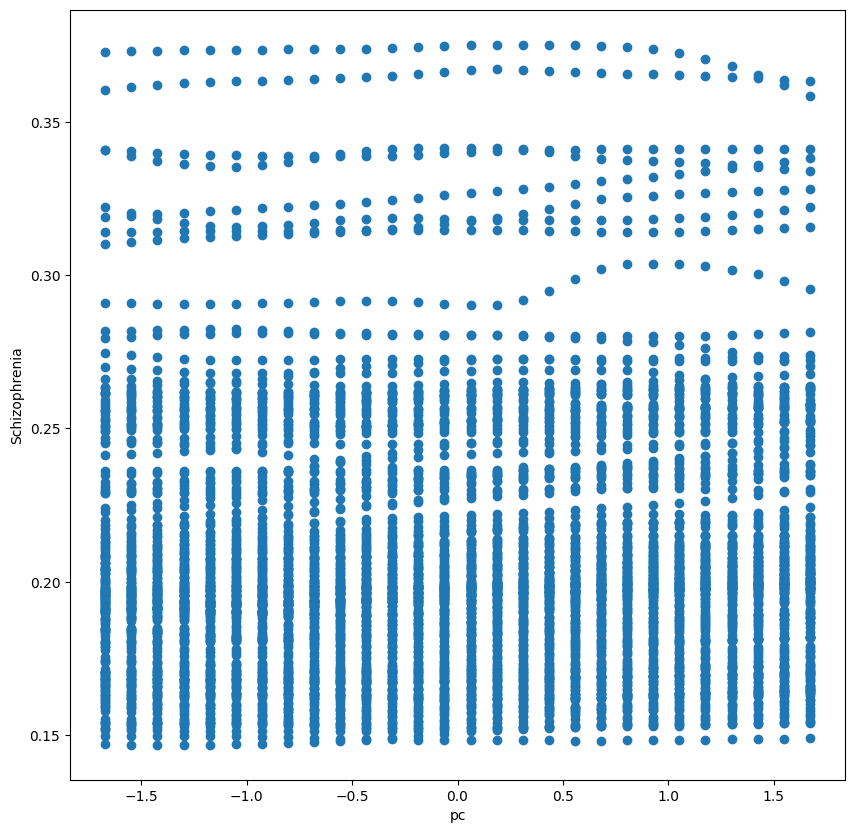

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x, Scaled_y_data[:, 0])
plt.xlabel('pc')
plt.ylabel('Schizophrenia')
plt.show()

In [ ]:
new_df = pd.DataFrame({'pc_x': x[:, 0],
                       'Schizophrenia (%)': Scaled_y_data[:, 0],
                       'Bipolar disorder (%)': Scaled_y_data[:, 1],
                       'Eating disorders (%)': Scaled_y_data[:, 2],
                       'Anxiety disorders (%)': Scaled_y_data[:, 3],
                       'Drug use disorders (%)': Scaled_y_data[:, 4],
                       'Depression (%)': Scaled_y_data[:, 5],
                       'Alcohol use disorders (%)': Scaled_y_data[:, 6],
                       'Prevalence in males (%)': Scaled_y_data[:, 7],
                       'Prevalence in females (%)': Scaled_y_data[:, 8],
                       'Population': Scaled_y_data[:, 9],
                       'Suicide rate (deaths per 100,000 individuals)': Scaled_y_data[:, 10],
                       'Depressive disorder rates (number suffering per 100,000)': Scaled_y_data[:, 11],
                       'People suffering from depression': Scaled_y_data[:, 12],
                       'gap': Scaled_y_data[:, 13]
                       })

In [ ]:
new_df

,pc_x,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),Prevalence in females (%),Population,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",People suffering from depression,gap
0,-1.671258,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,3.499982,4.647815,12412000.0,10.318504,4039.755763,318435.813670,1.147833
1,-1.547461,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,3.503947,4.655772,13299000.0,10.327010,4046.256034,329044.773956,1.151825
2,-1.423664,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,3.508912,4.662066,14486000.0,10.271411,4053.709902,382544.572895,1.153154
3,-1.299867,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,3.513429,4.669012,15817000.0,10.376123,4060.203474,440381.507393,1.155583
4,-1.176070,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,3.515578,4.673050,17076000.0,10.575915,4062.290365,456916.645489,1.157472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,1.176070,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641,2.769193,3.424106,13350000.0,28.361200,3048.264249,303564.603590,0.654913
5456,1.299867,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470,2.778101,3.437674,13587000.0,27.605547,3056.996704,311665.769283,0.659573
5457,1.423664,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751,2.789152,3.455323,13815000.0,27.197061,3068.250731,320638.507158,0.666171
5458,1.547461,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269,2.799308,3.479071,14030000.0,26.839591,3081.782858,330437.353798,0.679763


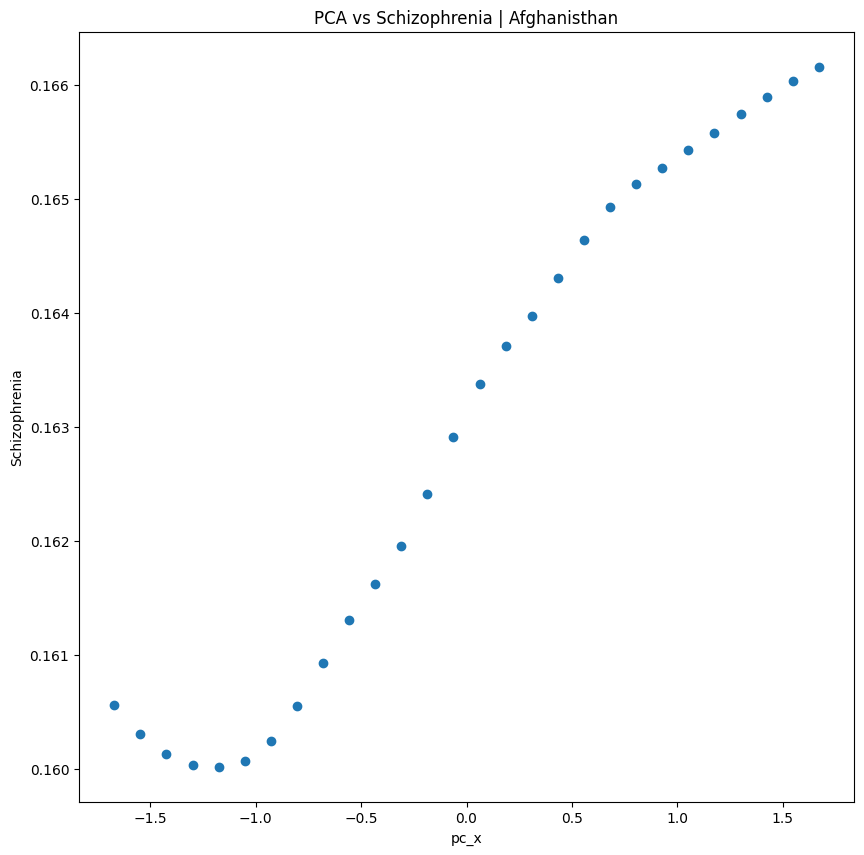

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(new_df['pc_x'][:28], Scaled_y_data[:28, 0])
plt.xlabel('pc_x')
plt.ylabel('Schizophrenia')
plt.title("PCA vs Schizophrenia | Afghanisthan")
plt.show()

For feature engineering, the following have been done throughout the code:

Imputation: By filling the missing values in population column, using the previous forward technique.

Encoding Categorical Variables: Used Label encoding for the Entity column containing the country names

Feature Scaling: Scaled the input attributes, (standardisation), to level the feature before PCA

Feature Extraction: Did PCA on the input features ie. Entity, and Year. Reduced it to one component.

Final Modelling

In [ ]:
user_input = input("Enter the country to predict: ")
if user_input not in countries_list:
    print("Country is not in data or does not exist! ")
else:
    subtable = table[table['Entity'] == country_mapping[user_input]]
    print(subtable)


Enter the country to predict: India
      Entity  Year  Schizophrenia (%)  Bipolar disorder (%)  \
2660      79  1990           0.261587              0.551971   
2661      79  1991           0.261660              0.552088   
2662      79  1992           0.261720              0.552194   
2663      79  1993           0.261766              0.552289   
2664      79  1994           0.261796              0.552373   
2665      79  1995           0.261811              0.552445   
2666      79  1996           0.261817              0.552532   
2667      79  1997           0.261822              0.552646   
2668      79  1998           0.261826              0.552765   
2669      79  1999           0.261833              0.552869   
2670      79  2000           0.261842              0.552938   
2671      79  2001           0.261885              0.553012   
2672      79  2002           0.261983              0.553141   
2673      79  2003           0.262116              0.553300   
2674      79  2004 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
column_index = {2: "Schizophrenia (%)", 3: "Bipolar disorder (%)", 4: "Eating disorders (%)", 5: "Anxiety Disorder (%)", 6: "Drug Use Disorder (%)", 7: "Depression (%)", 8: "Alcohol use Disorder (%)"}
print("2: Schizophrenia, 3: Bipolar Disorder, 4: Eating Disorder, 5: Anxiety Disorder, 6: Drug Use Disorder, 7: Depression, 8: Alcohol use Disorder")
y_coordinate = int(input("Enter code for prediction: "))


2: Schizophrenia, 3: Bipolar Disorder, 4: Eating Disorder, 5: Anxiety Disorder, 6: Drug Use Disorder, 7: Depression, 8: Alcohol use Disorder
Enter code for prediction: 2


In [ ]:
table.columns

Index(['Entity', 'Year', 'Schizophrenia (%)', 'Bipolar disorder (%)',
       'Eating disorders (%)', 'Anxiety disorders (%)',
       'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)',
       'Prevalence in males (%)', 'Prevalence in females (%)', 'Population',
       'Suicide rate (deaths per 100,000 individuals)',
       'Depressive disorder rates (number suffering per 100,000)',
       'People suffering from depression', 'gap'],
      dtype='object')

In [ ]:
column_lst = ['Entity', 'Year', 'Schizophrenia (%)', 'Bipolar disorder (%)',
       'Eating disorders (%)', 'Anxiety disorders (%)',
       'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)']
subtable_X = subtable.loc[:, column_lst]
subtable_X

,Entity,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
2660,79,1990,0.261587,0.551971,0.105016,3.323845,0.486651,3.758695,1.372084
2661,79,1991,0.261660,0.552088,0.105393,3.321820,0.481062,3.804294,1.387638
2662,79,1992,0.261720,0.552194,0.105952,3.319530,0.477685,3.844711,1.403009
2663,79,1993,0.261766,0.552289,0.106649,3.317123,0.475732,3.877968,1.416870
2664,79,1994,0.261796,0.552373,0.107376,3.314811,0.474916,3.903063,1.427810
2665,79,1995,0.261811,0.552445,0.108227,3.312676,0.474806,3.917893,1.434582
2666,79,1996,0.261817,0.552532,0.109236,3.308029,0.478044,3.922940,1.445345
2667,79,1997,0.261822,0.552646,0.110587,3.299918,0.484980,3.922614,1.464851
2668,79,1998,0.261826,0.552765,0.112075,3.291036,0.493819,3.920098,1.486882
2669,79,1999,0.261833,0.552869,0.113705,3.284052,0.500949,3.918082,1.505249


Multiple linear regression

In [ ]:
y = subtable.iloc[:, y_coordinate].values
X = subtable.drop(column_index[y_coordinate], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import r2_score, mean_squared_error
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

[[0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]]
R-squared: 0.9985974078283776
Mean Squared Error: 4.370539933814397e-10
Root Mean Squared Error: 2.0905836347332285e-05


Multiple Linear regression with interation feature



In [ ]:
y = subtable.iloc[:, y_coordinate].values
X = subtable.drop(column_index[y_coordinate], axis=1)

from sklearn.preprocessing import PolynomialFeatures
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X = interaction.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import r2_score, mean_squared_error
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

[[0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]]
R-squared: 0.99974540033232
Mean Squared Error: 7.933439507541002e-11
Root Mean Squared Error: 8.90698574577337e-06


polynomial regression

In [ ]:
y = subtable.iloc[:, y_coordinate].values
X = subtable.drop(column_index[y_coordinate], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import r2_score, mean_squared_error
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

[[0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]]
R-squared: 0.9998468015226775
Mean Squared Error: 4.773733067132833e-11
Root Mean Squared Error: 6.9092206992777655e-06


support vector regression

In [ ]:
y = subtable.iloc[:, y_coordinate].values
X = subtable.drop(column_index[y_coordinate], axis=1)
y = y.reshape(len(y),1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import r2_score, mean_squared_error
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

[[0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]]
R-squared: 0.9368117173700412
Mean Squared Error: 1.9689751459537085e-08
Root Mean Squared Error: 0.00014032017481295086


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM with polynomial feature composite

In [ ]:
y = subtable.iloc[:, y_coordinate].values
X = subtable.drop(column_index[y_coordinate], axis=1)

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(X)
y = y.reshape(len(y),1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import r2_score, mean_squared_error
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

[[0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]]
R-squared: 0.927445885131604
Mean Squared Error: 2.260818667111723e-08
Root Mean Squared Error: 0.00015036018978146186


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y = subtable.iloc[:, y_coordinate].values
X = subtable.drop(column_index[y_coordinate], axis=1)
from sklearn.preprocessing import PolynomialFeatures
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X = interaction.fit_transform(X)
y = y.reshape(len(y),1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import r2_score, mean_squared_error
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

[[0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]]
R-squared: 0.9283317888417291
Mean Squared Error: 2.2332135113083995e-08
Root Mean Squared Error: 0.00014943940281292613


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


random forest regression

In [ ]:
y = subtable.iloc[:, y_coordinate].values
X = subtable.drop(column_index[y_coordinate], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import r2_score, mean_squared_error
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

[[0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]]
R-squared: 0.7107006754734342
Mean Squared Error: 9.014696333334678e-08
Root Mean Squared Error: 0.0003002448389787021


decision tree regression

In [ ]:
y = subtable.iloc[:, y_coordinate].values
X = subtable.drop(column_index[y_coordinate], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import r2_score, mean_squared_error
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

[[0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]
 [0.26 0.26]]
R-squared: 0.837856413592706
Mean Squared Error: 5.05246666666636e-08
Root Mean Squared Error: 0.00022477692645523828


Model with best r2 score and least mean squared error

In [ ]:
y = subtable.iloc[:, y_coordinate].values
X = subtable.drop(column_index[y_coordinate], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import r2_score, mean_squared_error
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)